<a href="https://colab.research.google.com/github/ssrbazpur/Envisioning-Yellow-Taxi-High-Demand-Areas-in-NYC-city/blob/master/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><center><b><U>Data Preparation</U></b></center> </h3>
<h4><center><b>Prepared By: Simranjeet Randhawa</b></center> </h4>
<h4><center><b>Student ID: 200412297</b></center> </h4>




In [0]:
#Libraries Used
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools

In [2]:
#To switch off the scroll view in the output
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [0]:
#Need for Ploty Graphs
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
from datalab.context import Context

ModuleNotFoundError: ignored

In [0]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/Data Science/nyc-taxi-265120-baf9a3e4cf9b.json"
%reload_ext google.cloud.bigquery

In [0]:
project_id = 'nyc-taxi-265120' 
from google.cloud import bigquery
client = bigquery.Client(project = project_id)

In [0]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

<h3><b> 1. Data Preparation </b></h3>
<p align="justify"> Data preparation is termed as the process of cleaning the data so that the data can be transformed in a form that can be processed and analysed. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.
</p>

<h4><b> 1.1 Data Cleaning </b></h4>

<b><u> 2018 Yellow Cab Data Cleaning (Big Query)</u></b>
<p align="justify"> 
<ol><li> Analyse if there is rows with total trip amount =0 ? </li>
<li>Is there rows with pick up time > drop off time.</li><li>  Analyse rows which have 0 passenger count.</li>
</ol>
</p>

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where total_amount <= 0 
"""
df = client.query(query).to_dataframe()

In [18]:
df.shape

(1, 1)

In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where tpep_pickup_datetime > tpep_dropoff_datetime LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 and total_amount<=0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

<b><u> 2019 Yellow Cab Data Cleaning (Big Query)</u></b>
<p align="justify"> 
<ol><li> Analyse if there is rows with total trip amount =0 ? </li>
<li>Is there rows with pick up time > drop off time.</li><li>  Analyse rows which have 0 passenger count.</li>
</ol>
</p>

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where total_amount <= 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where tpep_pickup_datetime > tpep_dropoff_datetime LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 and total_amount<=0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

<b><u> INNER JOIN (Eliminating out of Bounds Location if exists)</u></b>

Eliminaing out of Bound Location with the help of INNER JOIN.<br>
<ol><li>
Table A- Taxi Trips Data </li>
<li>
Table B- Zone Data</li>
</ol>

<img src="https://helloacm.com/wp-content/uploads/2019/04/sql-joins-venn-diagrams-inner-join.png"/>

The INNER JOIN keyword selects all rows from both tables as long as there is a match between the columns. It gives only the trips pickups in the NYC region.</p>

In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where total_amount>0
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)


SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,

CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 AND td.daynumber<150
group by zone_id,A1,rounded_to_hour

"""
df1 = client.query(query).to_dataframe()

<h4> <b>5.2 Data Wrangling </b></h4>
<p align="justify"> Data wrangling which is also referred as data munging.The main moto transform data into a format that is more appropriate and considered more valuable.</p>
<b><u> 2018 Data Wrangling</u></b>

In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2018firsthalf`
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
b1.head()

zone_id                time  pickups
0       1 2018-01-01 00:00:00      0.0
1       1 2018-01-01 01:00:00      0.0
2       1 2018-01-01 02:00:00      0.0
3       1 2018-01-01 03:00:00      1.0
4       1 2018-01-01 04:00:00      3.0

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2018DataFirsthalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:56, 15.09s/it]


In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2018SecondHalf`
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2018DataSecondhalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:43, 11.34s/it]


<b><u> 2019 Data Wrangling</u></b>

In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2019firsthalf`
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2019 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2019DataFirsthalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:28,  8.09s/it]


In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2019secondhalf`
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2019 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
df1.head()

A1 zone_id rounded_to_hour  label
0  2019-07-16     233        00:00:00     34
1  2019-10-31      87        00:00:00     64
2  2019-07-16     141        00:00:00     48
3  2019-07-17      90        00:00:00     94
4  2019-07-17     232        00:00:00     14

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2019DataSecondhalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:37, 10.32s/it]


<b> <u> Taxi Zone Data Visulizations </u></b>

In [0]:
query = """
WITH ZONE AS (
SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`
)
SELECT * ,ST_X(p) as longitude,
  ST_Y(p) as latitude FROM ZONE

"""
df = client.query(query).to_dataframe()

In [0]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from datetime import datetime
import time
import seaborn as sns
import os
import math
import warnings

In [0]:
#detecting the pickups latitude and longitudes which are outside NYC.
outside_NYC = df[(df.latitude != 0) | (df.longitude != 0) ]
#latitude at equator is 0. Above equator latitude increases and becomes 90 at north pole. Below equator latitude decreases and
#is negative and becomes -90 at south pole.
#Longitude is 0 at United Kingdom(UK). To the right of UK, longitude increases positively and to the left of UK longitude decrease
#and is negative.
m = folium.Map(location = [40.5774, -73.7004], tiles = "Stamen Toner")
outside_pickups = outside_NYC.head(25000)
for i,j in outside_pickups.iterrows():
    if j["latitude"] != 0:
        folium.Marker(location=[j["latitude"], j["longitude"]],popup=j["zone_name"]).add_to(m)
m

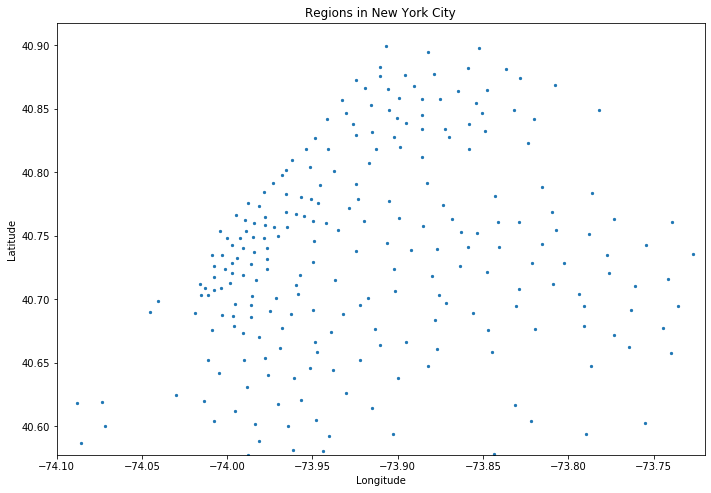

In [0]:
NYC_latitude_range = (40.5774, 40.9176)
NYC_Longitude_range = (-74.15, -73.7004)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = df.longitude.values[:70000], y = df.latitude.values[:70000], cmap = "Paired", s = 5)
ax.set_xlim(-74.10, -73.72)
ax.set_ylim(40.5774, 40.9176)
ax.set_title("Regions in New York City")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

<h3> <b> 6. Model Planning with Data Exploration </b> </h3>
<p align="justify">
Data Exploration is the phase where one tries to understand the data in hand and how the different variables interact between each other. In Machine Learning, Data Exploration always precede the creation of the predictive model as it allows us to come up with ideas in order to increase the models’ performances.
</p>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/Data Science/nyc-taxi-265120-baf9a3e4cf9b.json"
%reload_ext google.cloud.bigquery

In [0]:
project_id = 'nyc-taxi-265120' 
from google.cloud import bigquery
client = bigquery.Client(project = project_id)

In [0]:
query = """
SELECT  * FROM `hello.2019DataFirsthalf`
"""
first_2019 = client.query(query).to_dataframe()

In [0]:
query = """
SELECT  * FROM `hello.2019DataSecondhalf`
"""
second_2019 = client.query(query).to_dataframe()

In [0]:

query = """
SELECT  * FROM `hello.2018DataSecondhalf`
"""
second_2018 = client.query(query).to_dataframe()

In [0]:
query = """
SELECT  * FROM `hello.2018DataFirsthalf`
"""
first_2018 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
concat=pd.concat([first_2018,second_2018,second_2019,first_2019],ignore_index=True)

In [0]:
!pip install datalab

In [0]:
from datalab.context import Context
#Dont run this

concat.to_gbq('hello.CombinedData', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
10it [02:25, 14.71s/it]


In [0]:

len(df1.zone_id.unique())

259

In [0]:

len(df2.zone_id.unique())

258

In [0]:
data=df2

In [0]:
data["zone_id"] = data["zone_id"].astype(int)
data["dayofweek"] = data["dayofweek"].astype(int)

In [0]:

data.drop('P', axis=1, inplace=True)


In [0]:
import pandas as pd
data.time = pd.to_datetime(data.time,format='%Y-%m-%d')
data.index = data.time
data = data.drop('time', axis=1)
data = data.resample('D').sum() # Resmapling the time series data with month starting first.
# Train-Test splitting of time series data


In [0]:
data.head()

pickups
time                               
2018-01-01 00:00:00+00:00  231546.0
2018-01-02 00:00:00+00:00  233052.0
2018-01-03 00:00:00+00:00  261087.0
2018-01-04 00:00:00+00:00  119818.0
2018-01-05 00:00:00+00:00  259731.0

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


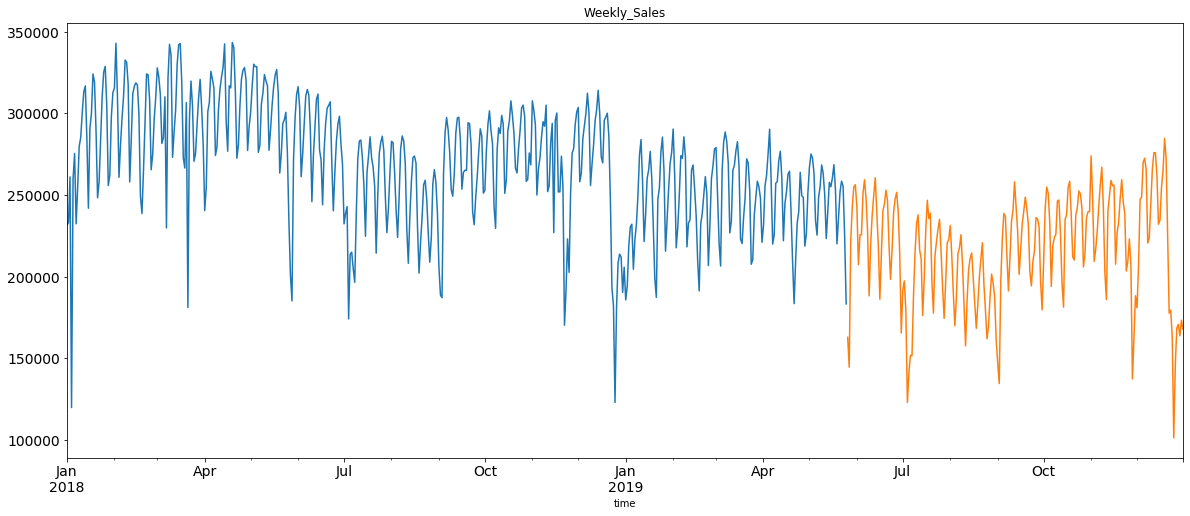

In [0]:
train_data = data[:int(0.7*(len(data)))]
test_data = data[int(0.7*(len(data))):]
# ARIMA takes univariate data.
train_data = train_data['pickups']
test_data = test_data['pickups']
# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [0]:
data = data.fillna(method='ffill')

In [0]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['pickups'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.8620831215235754
p-value: 0.35010313377312674
Critical Values:
	1%: -3.439593802573824
	5%: -2.865619356068967
	10%: -2.568942332870462


In [0]:
!pip install pyramid-arima

In [0]:
# Applying auto_arima model on train data.
from pyramid.arima import auto_arima
model_auto_arima = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,stepwise=False, suppress_warnings=True, D=1, max_D=10,error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=216120.095, BIC=216164.581, Fit time=10.754 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=223114.395, BIC=223129.224, Fit time=0.415 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=217121.887, BIC=217144.130, Fit time=1.084 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=217173.200, BIC=217195.443, Fit time=2.037 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=216140.457, BIC=216177.529, Fit time=5.204 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=216054.012, BIC=216105.912, Fit time=11.592 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=216169.532, BIC=216214.018, Fit time=4.722 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=213524.367, BIC=213583.682, Fit time=35.523 seconds
Fit ARIMA: order=(4, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=214609.706, BIC=214683.850, Fit time=33.353 secon

KeyboardInterrupt: ignored

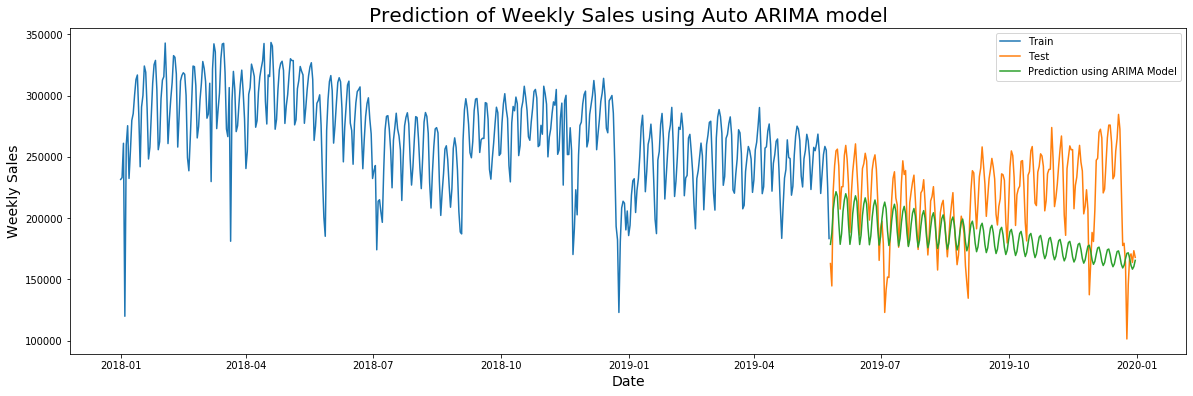

In [0]:
import matplotlib.pyplot as plt
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Pickups', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [0]:
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(test_data, forecast))

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


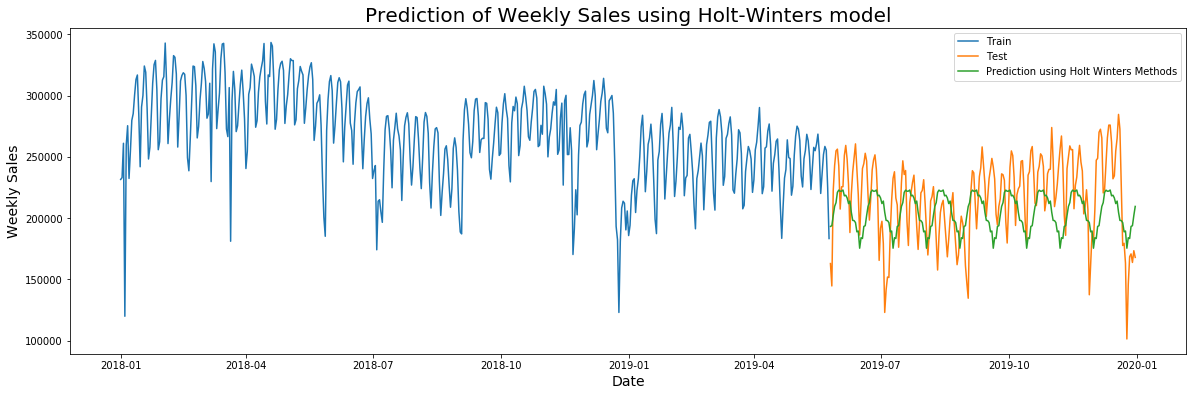

In [0]:
# Fitting the Holt-Winters method for Weekly Sales.
from statsmodels.tsa.api import ExponentialSmoothing
model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=24, seasonal='additive' ).fit() 
pred = model_holt_winters.forecast(len(test_data))# Predict the test data
#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Holt-Winters model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred, label='Prediction using Holt Winters Methods')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()


In [0]:
print('Mean Squared Error (MSE) of Holt-Winters: ', mean_squared_error(test_data, pred))
print('Root Mean Squared Error (RMSE) of Holt-Winters: ', math.sqrt(mean_squared_error(test_data, pred)))
print('Mean Absolute Deviation (MAD) of Holt-Winters: ', mean_absolute_error(test_data, pred))

NameError: ignored

Trying

In [0]:
a=df2

In [0]:
a.head()

zone_id                      time  pickups
0       7 2018-01-01 13:00:00+00:00     14.0
1       7 2018-01-04 12:00:00+00:00     14.0
2       7 2018-01-04 13:00:00+00:00     14.0
3       7 2018-01-05 21:00:00+00:00     14.0
4       7 2018-01-06 13:00:00+00:00     14.0

In [0]:
data=df2

In [0]:
a=df2
a = a.resample('D').sum()
ts=a.groupby(["time"])["pickups"].sum()


In [0]:
df2=a.groupby(["time"])["pickups"].sum().reset_index()

 

                         time   pickups
0   2018-01-01 00:00:00+00:00  231546.0
1   2018-01-02 00:00:00+00:00  233052.0
2   2018-01-03 00:00:00+00:00  261087.0
3   2018-01-04 00:00:00+00:00  119818.0
4   2018-01-05 00:00:00+00:00  259731.0
..                        ...       ...
725 2019-12-27 00:00:00+00:00  168499.0
726 2019-12-28 00:00:00+00:00  170764.0
727 2019-12-29 00:00:00+00:00  163766.0
728 2019-12-30 00:00:00+00:00  173360.0
729 2019-12-31 00:00:00+00:00  167889.0

[730 rows x 2 columns]


In [0]:
data.time = pd.to_datetime(data.time,format='%Y-%m-%d')
data.index = data.time
data = data.drop('time', axis=1)
data = data.resample('D').sum()

In [0]:
data.head()

pickups
time                               
2018-01-01 00:00:00+00:00  231546.0
2018-01-02 00:00:00+00:00  233052.0
2018-01-03 00:00:00+00:00  261087.0
2018-01-04 00:00:00+00:00  119818.0
2018-01-05 00:00:00+00:00  259731.0

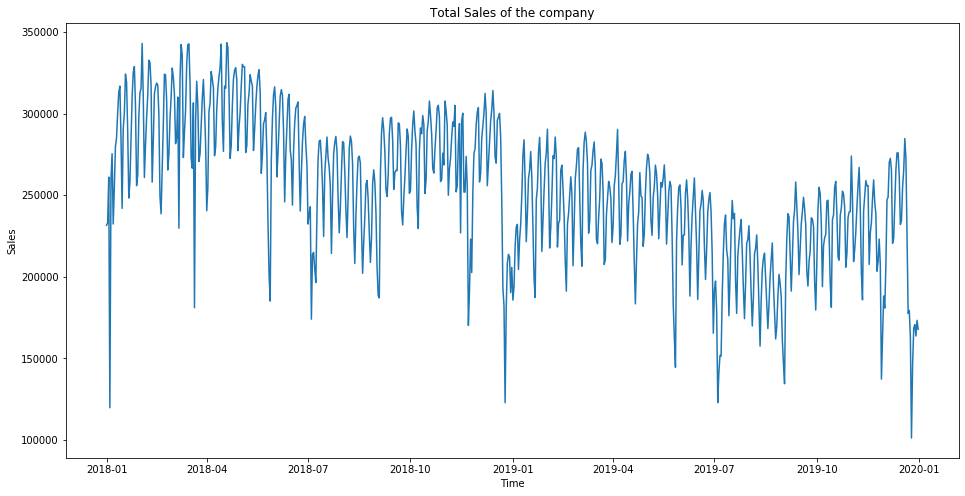

In [0]:
ts=data.groupby(["time"])["pickups"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

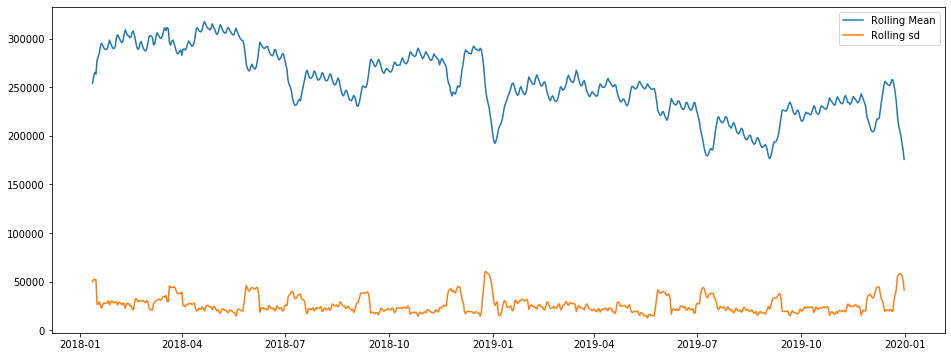

In [0]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

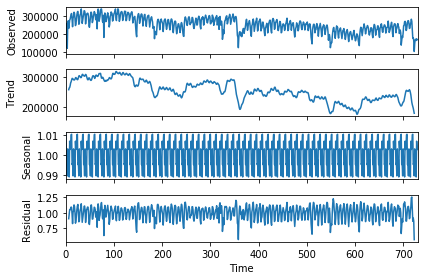

In [0]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

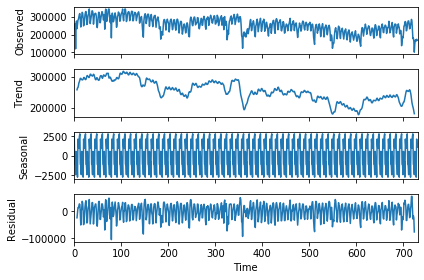

In [0]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

In [0]:
# Stationarity tests
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.862083
p-value                          0.350103
#Lags Used                      19.000000
Number of Observations Used    710.000000
Critical Value (1%)             -3.439594
Critical Value (5%)             -2.865619
Critical Value (10%)            -2.568942
dtype: float64


In [0]:
# to remove trend
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

[]

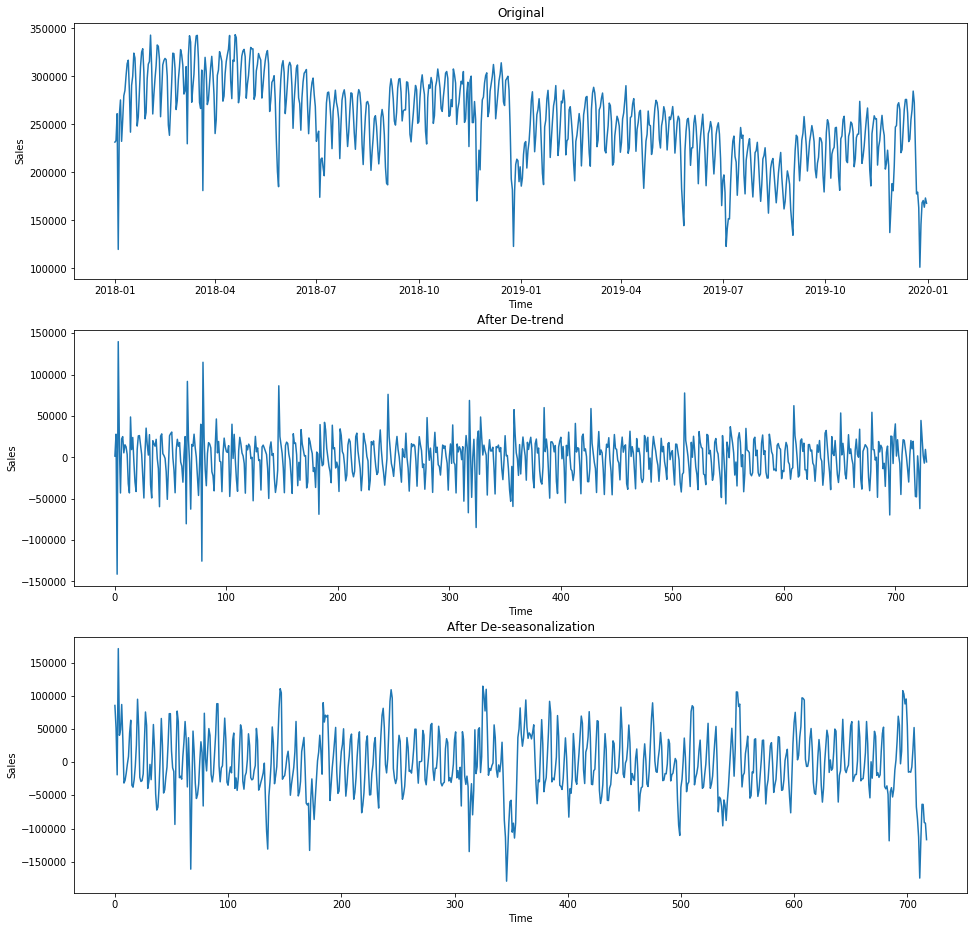

In [0]:
ts=data.groupby(["time"])["pickups"].sum()
ts.astype('float')
plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts,12)       # assuming the seasonality is 12 months long
plt.plot(new_ts)
plt.plot()

In [0]:
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                -7.981551e+00
p-value                        2.615200e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.970000e+02
Critical Value (1%)           -3.439767e+00
Critical Value (5%)           -2.865696e+00
Critical Value (10%)          -2.568983e+00
dtype: float64


In [0]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh',title=''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


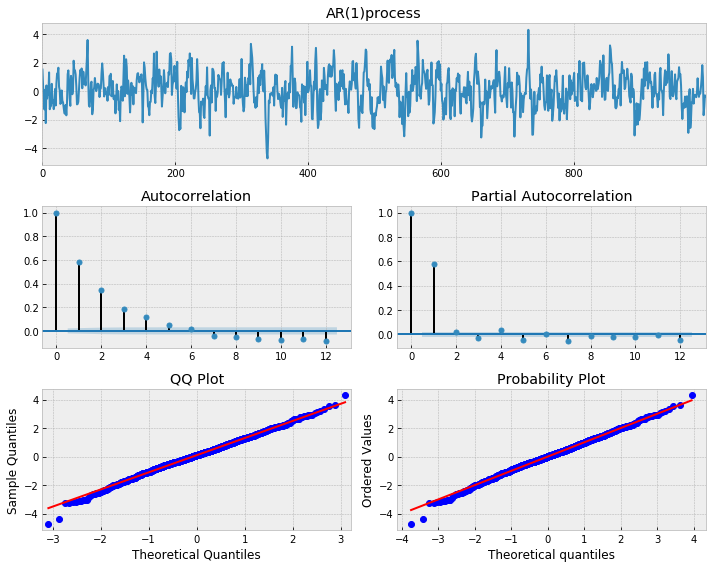

In [0]:
np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
limit=12    
_ = tsplot(x, lags=limit,title="AR(1)process")

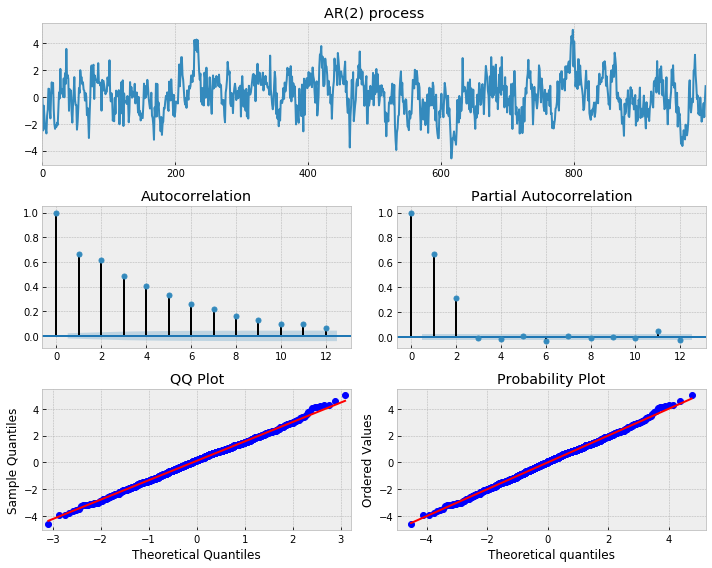

In [0]:
n = int(1000)
alphas = np.array([.444, .333])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ar2, lags=12,title="AR(2) process")

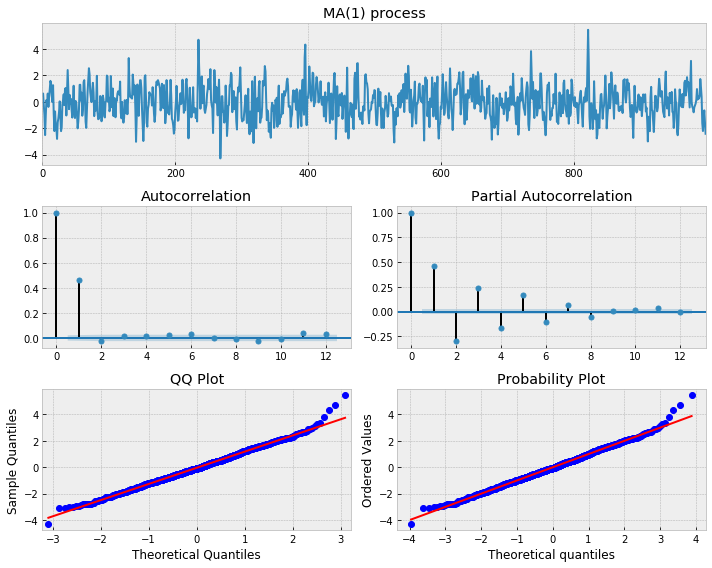

In [0]:
n = int(1000)
# set the AR(p) alphas equal to 0
alphas = np.array([0.])
betas = np.array([0.8])
# add zero-lag and negate alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
limit=12
_ = tsplot(ma1, lags=limit,title="MA(1) process")

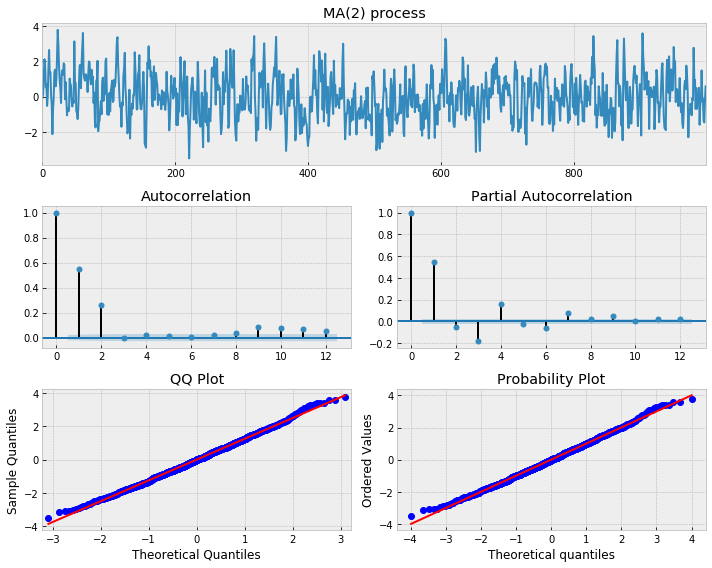

In [0]:
# Simulate MA(2) process with betas 0.6, 0.4
n = int(1000)
alphas = np.array([0.])
betas = np.array([0.6, 0.4])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
_ = tsplot(ma3, lags=12,title="MA(2) process")

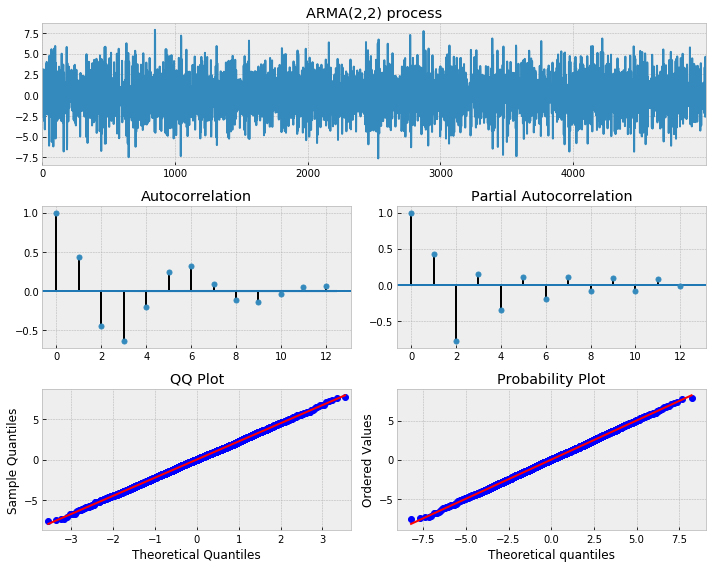

In [0]:
max_lag = 12

n = int(5000) # lots of samples to help estimates
burn = int(n/10) # number of samples to discard before fit

alphas = np.array([0.8, -0.65])
betas = np.array([0.5, -0.7])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma22 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = tsplot(arma22, lags=max_lag,title="ARMA(2,2) process")

In [0]:
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(arma22, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 15326.68109 | order: (2, 2)


In [0]:
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(new_ts.values, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 16754.26676 | order: (4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [0]:
best_mdl.predict()

In [0]:
data.head()

pickups
time                               
2018-01-01 00:00:00+00:00  231546.0
2018-01-02 00:00:00+00:00  233052.0
2018-01-03 00:00:00+00:00  261087.0
2018-01-04 00:00:00+00:00  119818.0
2018-01-05 00:00:00+00:00  259731.0

In [0]:
ts=data.groupby(["time"])["pickups"].sum()
ts.index=pd.date_range(start = '2018-01-01',end='2019-12-31', freq = 'D')
ts=ts.reset_index()
ts.head()

index   pickups
0 2018-01-01  231546.0
1 2018-01-02  233052.0
2 2018-01-03  261087.0
3 2018-01-04  119818.0
4 2018-01-05  259731.0

In [0]:
from fbprophet import Prophet
#prophet reqiures a pandas df at the below config 
# ( date column named as DS and the value column as Y)
ts.columns=['ds','y']
model = Prophet( yearly_seasonality=True) #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(ts) #fit the model with your dataframe

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods = 365, freq = 'D')  
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [0]:
forecast.head()

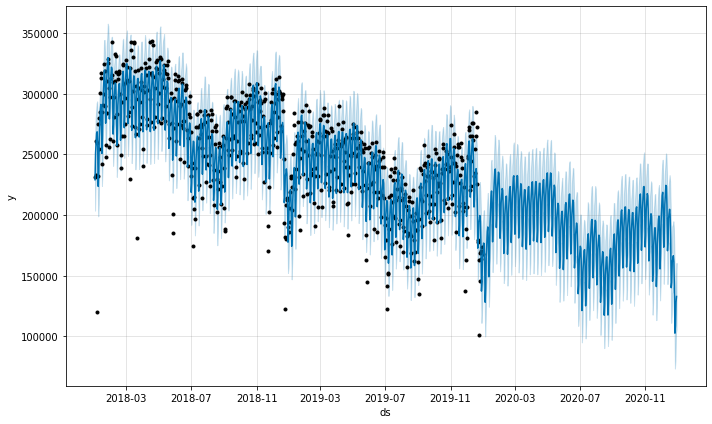

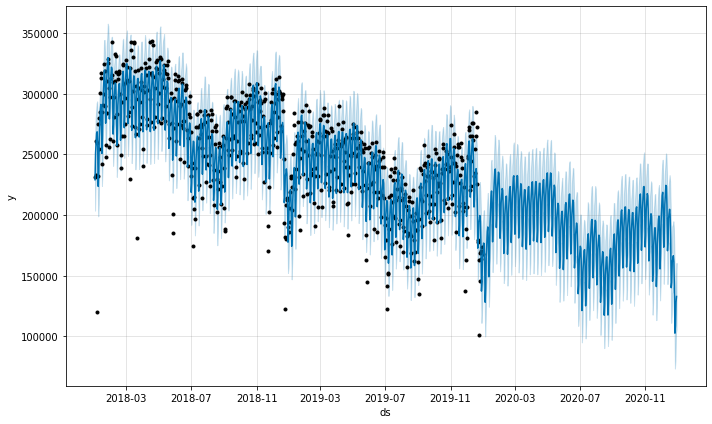

In [0]:
model.plot(forecast)

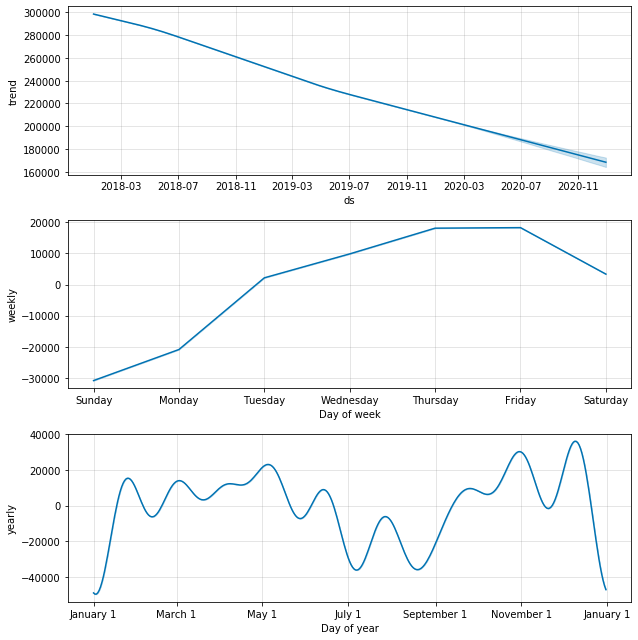

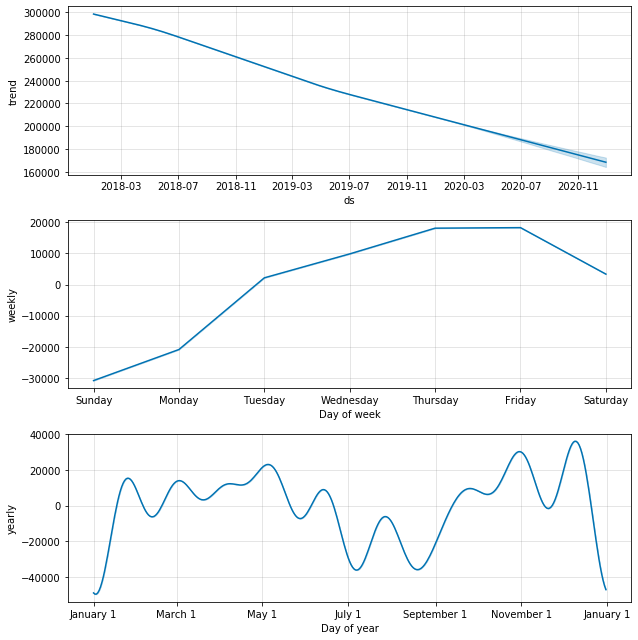

In [0]:
model.plot_components(forecast)

In [0]:
ts=df2.groupby(["time","zone_id"])["pickups"].sum()
# get the shops to the columns
monthly_shop_sales=monthly_shop_sales.unstack(level=1)
monthly_shop_sales=monthly_shop_sales.fillna(0)
monthly_shop_sales.index=dates
monthly_shop_sales=monthly_shop_sales.reset_index()
monthly_shop_sales.head()

Different Try

In [0]:
data=df2

In [0]:
data.time = pd.to_datetime(data.time,format='%Y-%m-%d')
data.index = data.time
data = data.drop('time', axis=1)
data = data.resample('D').sum()

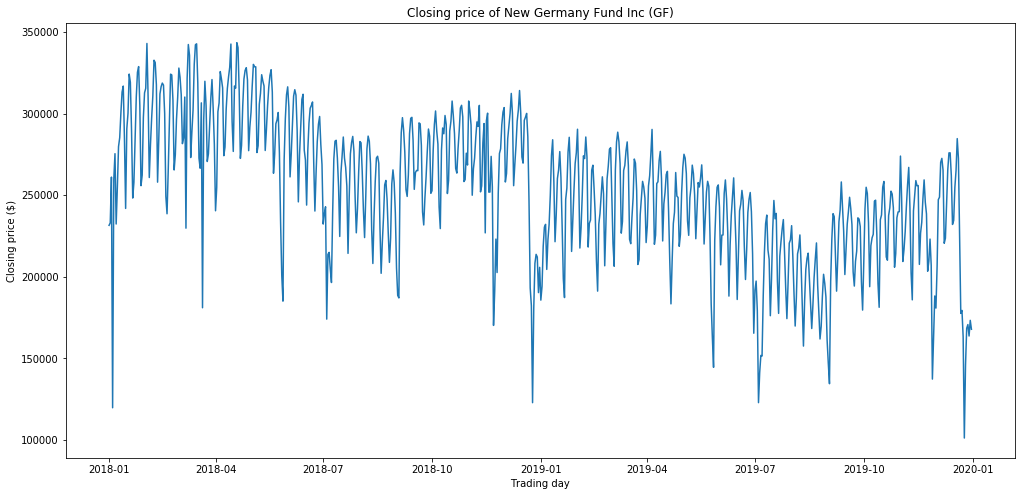

In [0]:
plt.figure(figsize=(17, 8))
plt.plot(data.pickups)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [0]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

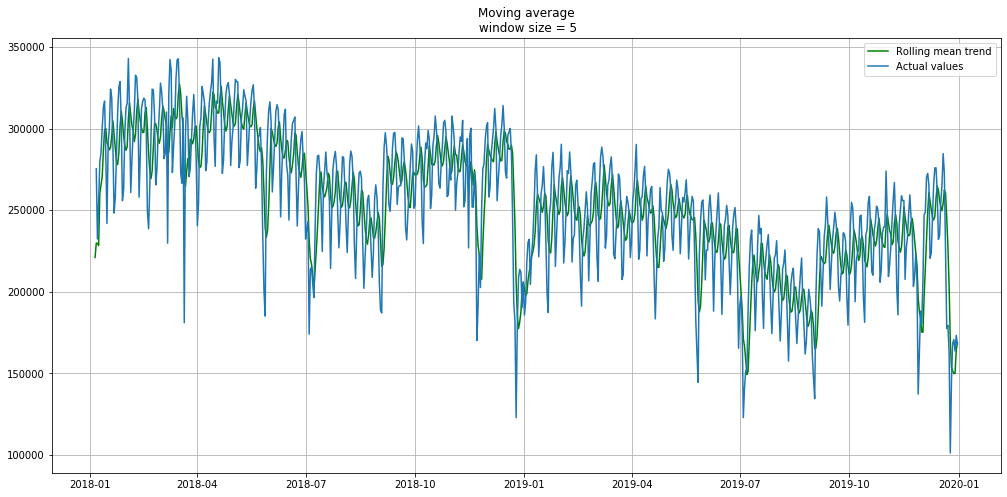

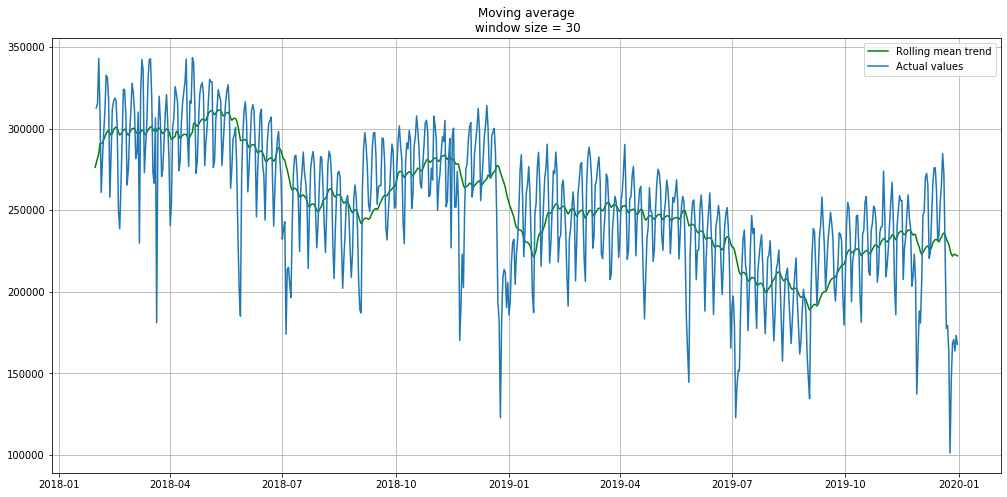

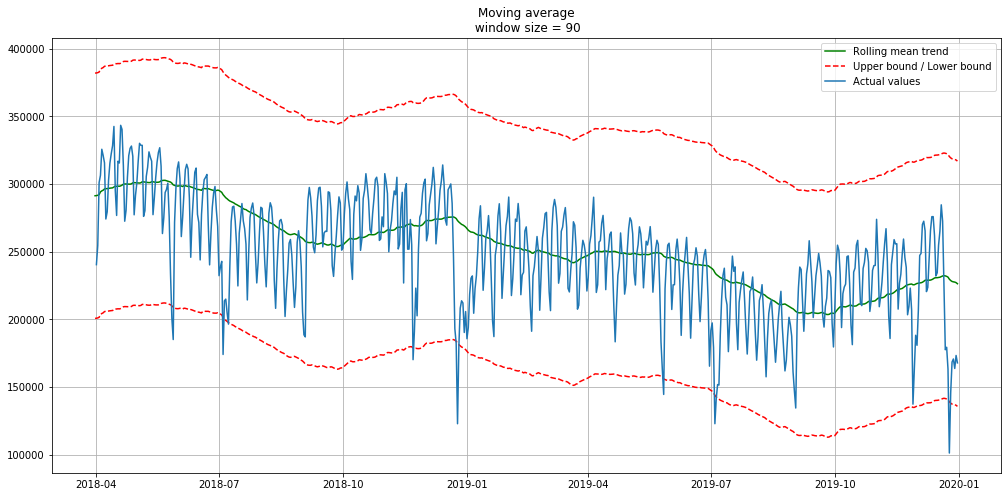

In [0]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(data.pickups, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data.pickups, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(data.pickups, 90, plot_intervals=True)

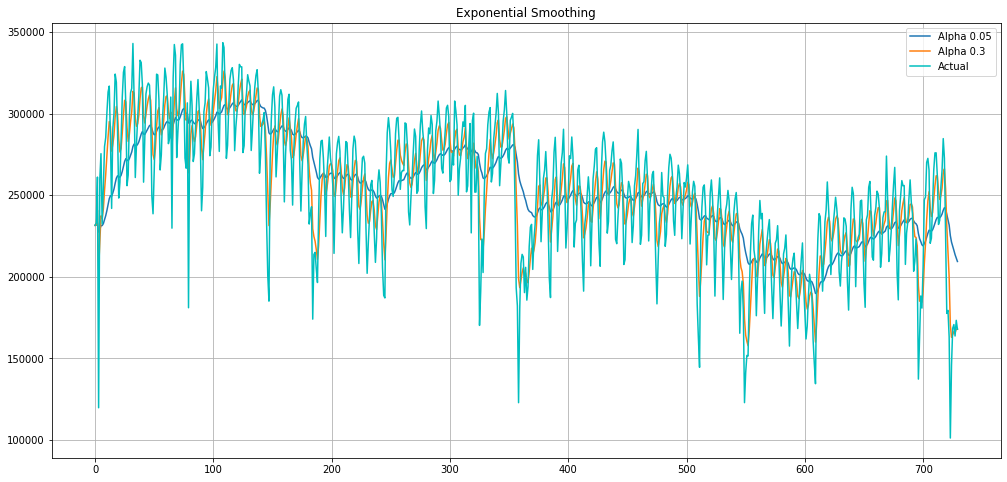

In [0]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(data.pickups, [0.05, 0.3])

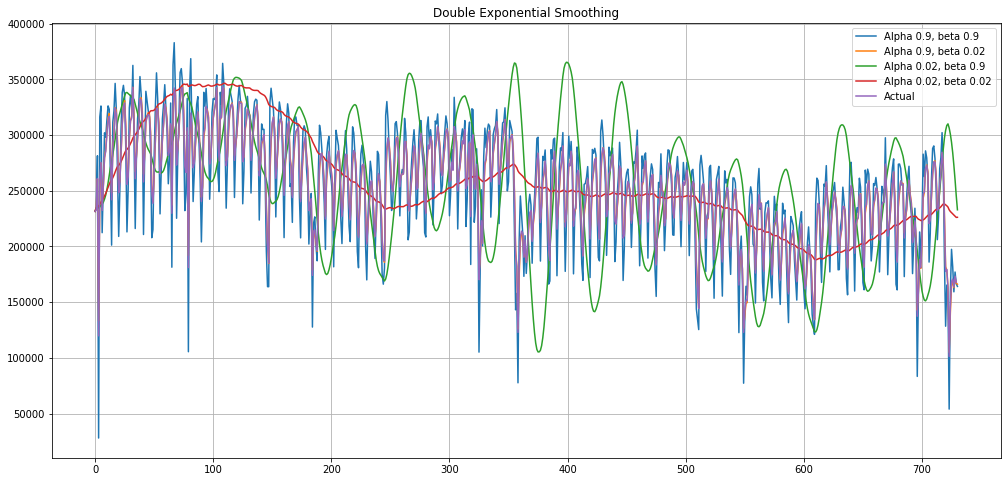

In [0]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.pickups, alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [0]:
pd.plotting.register_matplotlib_converters()

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



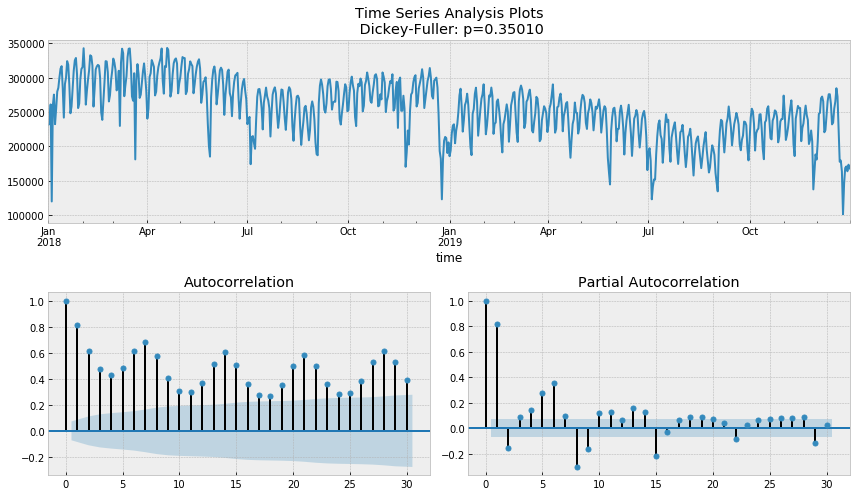

In [0]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.pickups, lags=30)

# Take the first difference to remove to make the process stationary


In [0]:
data_diff = data.pickups - data.pickups.shift(1)


/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



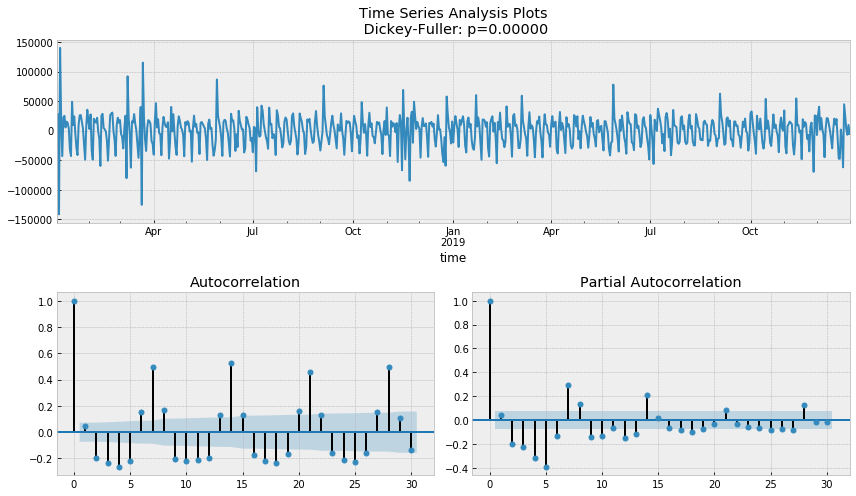

In [0]:
tsplot(data_diff[1:], lags=30)

In [0]:

def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        
        try:
            print("hello")
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [0]:
from tqdm import tqdm_notebook
result_table = optimizeSARIMA(parameters_list, d, D, s)

In [0]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [0]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [0]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

In [0]:
best_model = sm.tsa.statespace.SARIMAX(data.pickups, order=(1, d, 0),
                                       seasonal_order=(1, 2, 0, s)).fit(disp=-1)

print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                           pickups   No. Observations:                  730
Model:             SARIMAX(1, 1, 0)x(1, 2, 0, 5)   Log Likelihood               -8874.134
Date:                           Tue, 10 Mar 2020   AIC                          17754.268
Time:                                   05:23:10   BIC                          17768.001
Sample:                               01-01-2018   HQIC                         17759.570
                                    - 12-31-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2474      0.061      4.035      0.000       0.127       0.368
ar.S.L5       -0.6258      0.037    -16.929

In [0]:
best_model

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



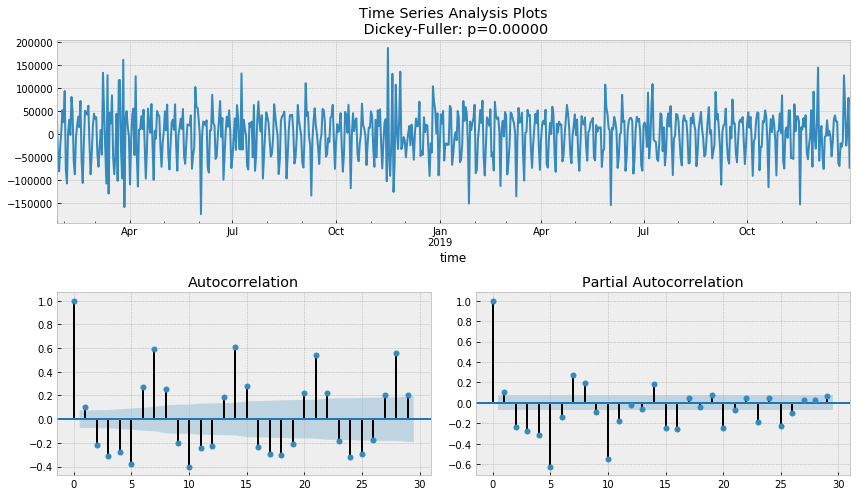

In [0]:
tsplot(best_model.resid[24+1:])

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

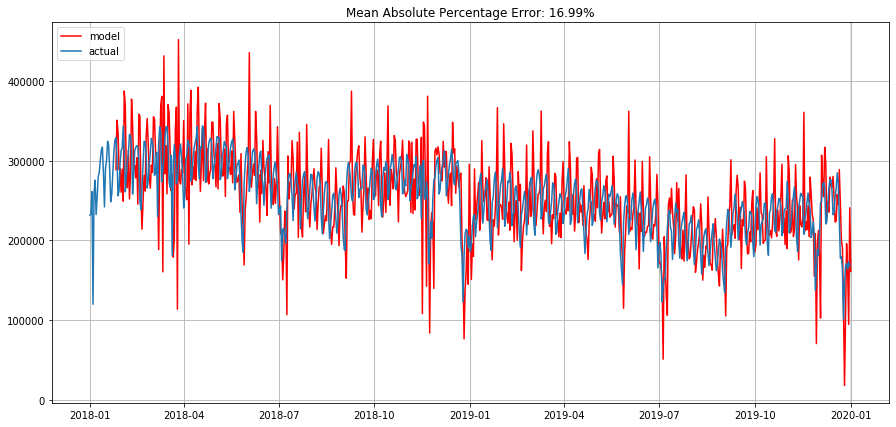

In [0]:
plotSARIMA(data, best_model, 0)

In [0]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
import lightgbm as lgb

In [0]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

In [0]:
importances = reg.feature_importances_

In [0]:
_ = plot_importance(reg, height=0.9)

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(reg, max_num_features=7, ax=ax)

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

In [0]:
a=rf.predict(X_test)

In [0]:
import lightgbm as lgb
print("Fitting...")
parameters = gbm.fit( X_train, y_train )
print("Fitted...")